<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/HUPV/notebooks/cv03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. cvičenie - Lineárny klasifikátor, gradientná optimalizácia

Na dnešnom cvičení si naimplementujeme jednoduchý lineárny klasifikátor na 2D dátach. 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## Syntetické dáta

Pre účely tohto cvičenia budeme najprv pracovať so syntetickými dátami. Tie si vygenerujeme, tak že budeme predpokladať, že 2D dáta sú z dvoch normálnych distribúcií, pričom každá z dvoch distribúcii korešponduje s jednou triedou.

Vygenerujeme si jednak trénovacie dáta a testovacie dáta.

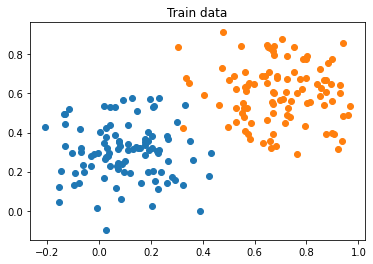

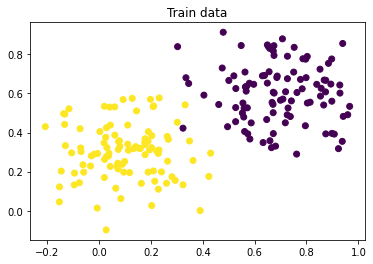

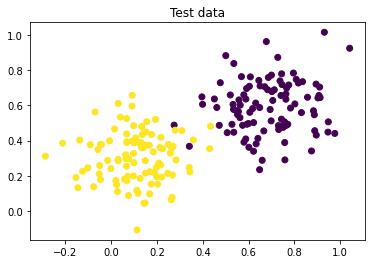

In [ ]:
np.random.seed(11)

x1_center = np.array([0.1, 0.3])
x1 =  x1_center + 0.15 * np.random.randn(100, 2)

x2_center = np.array([0.7, 0.6])
x2 =  x2_center + 0.15 * np.random.randn(100, 2)

# ak sú dáta rozdelené zobrazujú sa jednoducho
plt.scatter(x1[:, 0], x1[:, 1])
plt.scatter(x2[:, 0], x2[:, 1])
plt.title("Train data")
plt.show()

# dáta ešte upravíme, aby nám ostal vektor x s dátami a y s anotáciami
y = np.ones(200)
y[100:] = -1
x = np.concatenate([x1, x2], axis=0)

# dáta si ešte premiešame
pindxs = np.random.permutation(200)
x = x[pindxs]
y = y[pindxs]

plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Train data")
plt.show()

# vygenerujeme si aj testovacie data
x1_test = x1_center + 0.15 * np.random.randn(100, 2)
x2_test =  x2_center + 0.15 * np.random.randn(100, 2)
y_test = np.ones(200)
y_test[100:] = -1
x_test = np.concatenate([x1_test, x2_test], axis=0)
pindxs = np.random.permutation(200)
x_test = x_test[pindxs]
y_test = y_test[pindxs]

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
plt.title("Test data")
plt.show()

## Lineárny binárny klasifikátor

Ako prvý si teda spravíme najjednoduchší tzv. binárny lineárny klasifkátor.

Tento klasifikátor môžeme vnímať ako funkciu $f: \mathbb{R}^n \mapsto \{-1, 1\}$. Vstupom sú tzv. príznakové vektory. Momentálne budeme pracovať s vektormi z $\mathbb{R}^2$ teda vstup je reprezentovaný 2 reálnymi číslami. Výstupom bude 1 ak daný vektor budeme klasifikovať ako prvú (pozitívnu) triedu a -1 ak budeme daný vstup klasifikovať ako druhú (negatívnu triedu).

Funkcia $f$ je teda klasifikátor, ale zatiaľ neviem ako presne $f$ bude vyzerať. Ak chceme aby bol náš klasifikátor bude $f$ mať tvar:

$$ f(\vec{x}) = \text{sgn}(\vec{w}^T \vec{x} + b) = \text{sgn}\left(\sum_{i=1}^n w_i \cdot x_i + b\right),$$

kde $\vec{w} \in \mathbb{R}^n$ (v našom prípade $n = 2$), $b \in \mathbb{R}$ a $\text{sgn}$ je funkcia signum, ktorá je pre nulu definovaná ako 1. Máme teda vektor tzv. váh $\vec{w}$ a bias $b$, čo sú parametre nášho modelu. Našim cieľom bude nájsť také $\vec{w}, b$ aby náš klasifikátor fungoval čo najlepšie.


Najprv si vygenerujeme náhodné dáta, ktoré budeme klasifikovať. Pre jednoduchosť budeme predpokladať že dáta sú 2D a každá trieda má vlastnú normálnu distribúciu. Pre reprodukovateľnosť si nastavíme seed.

### 1. Úloha - Predikcia

Naimplementujte funkciu ktorá pre zadané parametre $\vec{w}$ a $b$ na našich dátach. Chceme vrátiť jednak predikované triedy a presnosť ktorá je vyjadrená ako podiel správne klasifikovaných vstupov.

Na zobrazenie môžte použiť funkciu ktorá zobrazí aj priamku, ktorá rozdeľuje rovinu.


In [ ]:
def display_binary_cls(x, y, w, b):
  if x.shape[1] != 2:
    raise TypeError("x has to represent 2-d points of shape (n, 2)")
  if y.shape[0] != x.shape[0]:
    raise TypeError("x and y have to have same number of rows")      
  if w.shape[0] != 2:
    raise TypeError("w has to be an array of shape (2,) ")

  xmin = np.min(x[:, 0])
  xmax = np.max(x[:, 0])
  ymin = np.min(x[:, 1])
  ymax = np.max(x[:, 1])

  plt.xlim(xmin=xmin - 0.1, xmax=xmax + 0.1)
  plt.ylim(ymin=ymin - 0.1, ymax=ymax + 0.1)


  if w[1] == 0.0:
    plt.plot([-b / w[0], -b / w[0]], [ymin, ymax], c='black')
  else:

    ymin = (- w[0] * xmin - b) / w[1]
    ymax = (- w[0] * xmax - b) / w[1]

    plt.plot([xmin, xmax], [ymin, ymax], c='black')

  plt.scatter(x[:, 0], x[:, 1], c=y)
  plt.show()

Naimplementujte funkciu binary_cls(x, w, b), ktorá bude na vstupe mať vstupné dáta x a parametre modelu $\vec{w}$ a $b$. Na výstupe vráti array y, ktorá bude obsahovať značky -1, alebo 1.

In [ ]:
def binary_cls(x, w, b):
  # doimplementujte
  ...

Funkciu si otestujte na odhatnutých parametroch, ktoré by mali dať celkom dobrú presnosť (nad 90 percent).

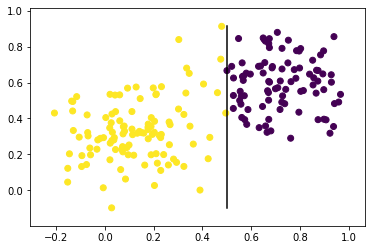

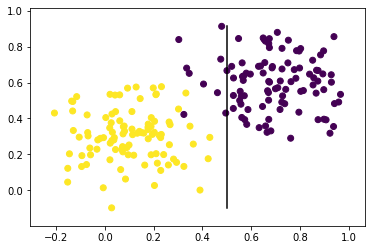

Accuracy of classifier:  0.955


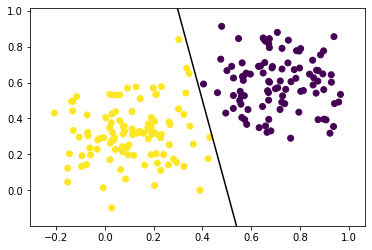

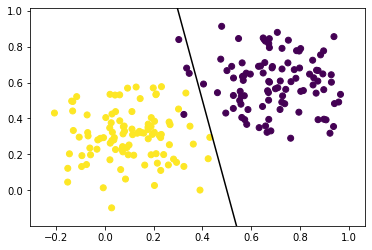

Accuracy of classifier:  0.98


In [ ]:
w = np.array([-1.0,0.0])
b = 0.5

y_pred = binary_cls(x, w, b)
display_binary_cls(x, y_pred, w, b)
display_binary_cls(x, y, w, b)

acc = np.sum(y_pred == y)/len(y)
print("Accuracy of classifier: ", acc)



w = np.array([-1.0, -0.2])
b = 0.5

y_pred = binary_cls(x, w, b)
display_binary_cls(x, y_pred, w, b)
display_binary_cls(x, y, w, b)

acc = np.sum(y_pred == y)/len(y)
print("Accuracy of classifier: ", acc)

### 2. Úloha - Trénovanie

Ručne odhadnuté parametre sú pri 2D dátach fajn, ale bolo by ideálne, aby sme ich odhadli automaticky, resp. aby sa ich stroj nejako naučil (preto machine learning). Tento problém si premeníme na štandardnú optimalizačnú úlohu. Budeme hľadať parametre $\vec{w}$ a $b$, tak aby sme minimalizovali nejakú funkciu $L(\vec{w}, b, X, Y)$, kde $X = (\vec{x}_1, \vec{x}_2,~...~\vec{x}_m)$ predstavuje vstupné dáta a $Y = (y_1, y_2,~...,~y_m)$ anotácie.

$L$ nazývame aj stratová funkcia a môže mať rôzny tvar. Dnes použijeme takúto:

$$L(\vec{w}, b, X, Y) = \frac{1}{m} \sum_{i = 1}^m \text{max}\left(0, 1 - y_i \left(\vec{w}^T \vec{x}_i + b\right)\right)$$

Aby sme našli optimálne parametre, tak využijeme gradientný zostup. Ten spočíva v tom, že parametre $\vec{w}$ a $b$ budeme odhadovať iteratívne tak, že najprv určíme náhodné parametre a ich upravíme na základe pravidiel:

$$b^{n + 1} = b^n - \eta \frac{\partial L}{\partial b}(\vec{w}^n, b^n, X, Y)$$

$$w_j^{n + 1} = w_j^n - \eta \frac{\partial L}{\partial w_j}(\vec{w}^n, b^n, X, Y)$$,

kde $\eta$ je tzv. veľkosť kroku. Samozrejme musíme poznať gradienty:

$$\frac{\partial L}{\partial b}(\vec{w}_j^n, b^n, X, Y) = \frac{1}{m} \sum_{i = 1}^m -z_i^n y_i$$,
$$\frac{\partial L}{\partial w_j}(\vec{w}_j^n, b^n, X, Y) = \frac{1}{m} \sum_{i = 1}^m -z_i^n y_i x_{i, j} $$,

kde $x_{i, j}$ je $j$-tá zložka $i$-tého vektora z trénovacej množiny X a

$$z_i^n = \begin{cases} 1,~ak~\left(\vec{w}^{nT} \vec{x}_i + b\right) y_i < 1 \\ 0,~inak \end{cases}$$

Napíšte funkciu train_binary_cls(x, y, w_init, b_init, eta), ktorá na vstupe bude mať $X, Y, \vec{w}^0, b^0, \eta$ a počet krokov iterácie $n$ a na výstupe vráti $\vec{w}^n$ a $b^n$. Pri každom stom kroku navyše vypíše hodnotu stratovej funkcie.

### Bonusová úloha

Ako bonus si môžete skúsiť odvodiť gradienty implementovať ich pre prípad ak naša loss funkcia bude obsahovať aj regularizačný člen teda:

$$L(\vec{w}, b, X, Y) = \frac{1}{m} \sum_{i = 1}^m \text{max}\left(0, 1 - y_i \left(\vec{w}^T \vec{x}_i + b\right)\right) + \lambda \sum_{i=1}^2 w_i^2$$

Parameter $\lambda$ potom pridajte ako argument do funcie train_binary_cls.


In [ ]:
def train_binary_cls(x, y, w, b, eta, n):
  # doimplementujte
  
  return w, b

Kód otestujeme



At step 0 loss: 1.074400979741701
At step 100 loss: 0.9768745668938247
At step 200 loss: 0.9183557493079431
At step 300 loss: 0.8630225347711392
At step 400 loss: 0.8088860971227231
At step 500 loss: 0.7553136587807119
At step 600 loss: 0.7018070466989224
At step 700 loss: 0.6485332647474178
At step 800 loss: 0.5952815772030314
At step 900 loss: 0.5420299267751758
At step 1000 loss: 0.48882695163693013
At step 1100 loss: 0.43566609553502905
At step 1200 loss: 0.384110452457046
At step 1300 loss: 0.34016929750627267
At step 1400 loss: 0.3065643989055752
At step 1500 loss: 0.27957765237568477
At step 1600 loss: 0.25558231180574736
At step 1700 loss: 0.23453370102083898
At step 1800 loss: 0.21914966101029898
At step 1900 loss: 0.2069879094493008
At step 2000 loss: 0.1963507697301243
At step 2100 loss: 0.18754689022912277
At step 2200 loss: 0.18018877971660935
At step 2300 loss: 0.17361939535698034
At step 2400 loss: 0.16767605226831953
At step 2500 loss: 0.16192966186048682
At step 2600 l

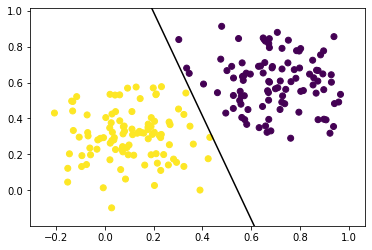

Accuracy of classifier on training data:  0.995


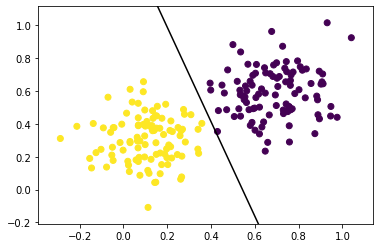

Accuracy of classifier on test data data:  0.98


In [ ]:
w_train, b_train = train_binary_cls(x, y, np.array([0.0, 0.5]), -1.0, 1e-2, 5000)
print(w_train, b_train)

y_pred = binary_cls(x, w_train, b_train)
display_binary_cls(x, y_pred, w_train, b_train)
acc = np.sum(y_pred == y)/len(y)
print("Accuracy of classifier on training data: ", acc)


y_pred_test = binary_cls(x_test, w_train, b_train)
display_binary_cls(x_test, y_pred_test, w_train, b_train)
acc_test = np.sum(y_pred_test == y_test)/len(y)
print("Accuracy of classifier on test data data: ", acc_test)

## Pytorch - automatická derivácia

Pri jednoduchom lineárnom klasifikátore sme si vedeli gradienty pre účel optimalizácie vedeli naimplementovať aj ručne. Samozrejme pri komplikovanejších modeloch by to bolo zložitejšie. Preto si ukážeme ako je možné použiť framework PyTorch a vypočítať gradient automaticky.

PyTorch v jadre operuje na tenzoroch veľmi podobne ako NumPy. Avšak PzyTorch navyše počíta medzivýpočty, tak aby bolo možné spočítať gradienty a je tiež optimalizovaný pre výpočty na GPU. Framework je navyše veľmi "pythonic", čo je sa obecne dá považovať za výhodu.

In [ ]:
import torch
from torch.autograd import Variable

Tensor sa dá vytvoriť z numpy pomocou torch.from_numpy, alebo cez konštruktor torch.Tensor. Podobne sa dajú vytvoriť premenné. Často je nutné dať si pozor na typ, ktorý daný vektor má. Pretypovať je ho možné metódou type. Niekedy však postačuje si ho pretypovať priamo v numpy.

In [ ]:
a = torch.from_numpy(np.array([4, 6, 7, 9]))
print(a)
print(a.shape)
print(a.type())
b = torch.from_numpy(np.array([[4, 6, 7, 9], [1, 1, 1, 1] ]))
print(b)
print(b.shape)
print(b.type())
bb = b.type(torch.FloatTensor)
print(bb.type())


c = torch.from_numpy(np.array([[4, 6, 7, 9], [1, 1, 1, 1] ], dtype=np.float32))
print(c)
print(c.shape)
print(c.type())

d = torch.Tensor([1,0,4])
print(d)
print(d.type())

e = torch.Tensor([1,0,4]).type(torch.LongTensor)
print(e)
print(e.type())

tensor([4, 6, 7, 9])
torch.Size([4])
torch.LongTensor
tensor([[4, 6, 7, 9],
        [1, 1, 1, 1]])
torch.Size([2, 4])
torch.LongTensor
torch.FloatTensor
tensor([[4., 6., 7., 9.],
        [1., 1., 1., 1.]])
torch.Size([2, 4])
torch.FloatTensor
tensor([1., 0., 4.])
torch.FloatTensor
tensor([1, 0, 4])
torch.LongTensor


Konvertovať naspäť je možné tiež najmä pomocou metódy numpy().


In [ ]:
dn = d.numpy()
print(dn)
print(type(dn))
print(dn.shape)

[1. 0. 4.]
<class 'numpy.ndarray'>
(3,)


Rovnako ako numpy array, tak aj torch Tensor je možné indexovať. Ak máme tenzor len s jedným prvkom, tak ho môžeme získať pomocou metódy item.

In [ ]:
r = torch.from_numpy(np.random.rand(10, 4, 5))


print(r[0, 0, 0])
print(r[:, 1])
print(r[1:3, :, 0])
print(r[::2, 0, 1:4])

print(r[0, 0, 0].item())
print(type(r[0, 0, 0]))
print(type(r[0, 0, 0].item()))


tensor(0.0974, dtype=torch.float64)
tensor([[0.6323, 0.7324, 0.5328, 0.9185, 0.0697],
        [0.3859, 0.4914, 0.7534, 0.2725, 0.8514],
        [0.6957, 0.7258, 0.6996, 0.9706, 0.8613],
        [0.3766, 0.7910, 0.1675, 0.2539, 0.5375],
        [0.4619, 0.8787, 0.7478, 0.0297, 0.1948],
        [0.4273, 0.5912, 0.6343, 0.4327, 0.8512],
        [0.4796, 0.5718, 0.0427, 0.9734, 0.8586],
        [0.2165, 0.7318, 0.0751, 0.7804, 0.5254],
        [0.4423, 0.2371, 0.7308, 0.9499, 0.8423],
        [0.0468, 0.8886, 0.2325, 0.2100, 0.0064]], dtype=torch.float64)
tensor([[0.5752, 0.3859, 0.9189, 0.6061],
        [0.3751, 0.6957, 0.5232, 0.6622]], dtype=torch.float64)
tensor([[0.1374, 0.4940, 0.6875],
        [0.7878, 0.2281, 0.8697],
        [0.8157, 0.6389, 0.7300],
        [0.0800, 0.2401, 0.5659],
        [0.6258, 0.2123, 0.3753]], dtype=torch.float64)
0.09743909439945198
<class 'torch.Tensor'>
<class 'float'>


Ak cheme použiť model nášho klasifikátora, tak si najprv vytvoríme premenné nášho modelu. Funkcia forward potom vráti výsledok pred aplikáciou funkcie signum.

Model si môžeme otestovať na najekých dátach. Ak cheme robiť iba predikciu, tak musíme torchu dať vedieť, že nepotrebujeme aby si robil medzivýpočty pre gradienty. Všimnite si vstupy do funkcie sú torch tensory. Teda tenzor je niečo na čom dokáže torch realizovať operácie.

*Pozn.:* Ak budeme chcieť používať vektorové operácie, tak budeme predpokladať, že vždy na vstupe budeme dávať vektory v tvare $N \times 2$, kde ale $N$ môže byť aj 1.

In [ ]:
w = Variable(torch.randn(2).type(torch.FloatTensor), requires_grad=True)
b = Variable(torch.randn(1).type(torch.FloatTensor), requires_grad=True)

def forward(x, w, b):
  return torch.tensordot(w, x, dims=[[0], [1]]) + b  

def predict(x, w, b):
  return torch.where(forward(x, w, b) > 0.0, 1, -1)

with torch.no_grad():
  print(forward(torch.from_numpy(np.array([[0.5, 0.5]], dtype=np.float32)), w, b))
  print(forward(torch.from_numpy(np.array([[1.0, -0.5]], dtype=np.float32)), w, b))
  print(forward(torch.from_numpy(np.array([[-0.9, 4.4]], dtype=np.float32)), w, b))

  print(predict(torch.from_numpy(np.array([[0.5, 0.5]], dtype=np.float32)), w, b))
  print(predict(torch.from_numpy(np.array([[1.0, -0.5]], dtype=np.float32)), w, b))
  print(predict(torch.from_numpy(np.array([[-0.9, 4.4]], dtype=np.float32)), w, b))

tensor([-1.5085])
tensor([-0.0113])
tensor([-7.0962])
tensor([-1])
tensor([-1])
tensor([-1])


Trénovanie môžeme implementovať veľmi jednoducho. Najprv si vypočítame stratovú funkciu. Tá bude torch Tensor a môžeme na ňu zavolať metódu backward, ktorá vypočíta gradient pre všetky medzikroky.

At step: 0 loss: 1.220276117324829
At step: 100 loss: 1.0140491724014282
At step: 200 loss: 0.9399444460868835
At step: 300 loss: 0.8765504956245422
At step: 400 loss: 0.814877986907959
At step: 500 loss: 0.7553272247314453
At step: 600 loss: 0.6973854303359985
At step: 700 loss: 0.640635073184967
At step: 800 loss: 0.5844128727912903
At step: 900 loss: 0.5286194086074829
At step: 1000 loss: 0.47302910685539246
At step: 1100 loss: 0.4194865822792053
At step: 1200 loss: 0.3710044026374817
At step: 1300 loss: 0.3286511301994324
At step: 1400 loss: 0.29268887639045715
At step: 1500 loss: 0.2631978392601013
At step: 1600 loss: 0.2390293926000595
At step: 1700 loss: 0.22148936986923218
At step: 1800 loss: 0.20762929320335388
At step: 1900 loss: 0.19654430449008942
At step: 2000 loss: 0.18642811477184296
At step: 2100 loss: 0.17771343886852264
At step: 2200 loss: 0.1699192225933075
At step: 2300 loss: 0.16336241364479065
At step: 2400 loss: 0.15764854848384857
At step: 2500 loss: 0.152465671

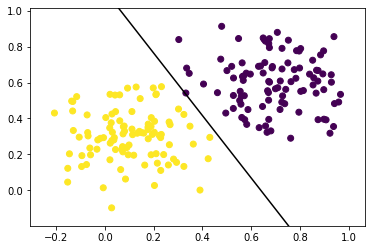

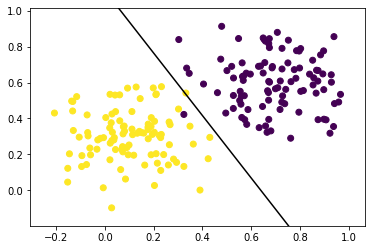

In [ ]:
def train_torch_binary_cls(x, y, w, b, eps, n):
  x = torch.from_numpy(x).type(torch.FloatTensor)
  y = torch.from_numpy(y).type(torch.FloatTensor)

  for i in range(n):

    out = forward(x, w, b)
    loss = torch.mean(torch.clip(1 - out * y, min=0.0))  

    if i % 100 == 0:
      print("At step: {} loss: {}".format(i, loss.item()))

    # dáme spočítať všetky gradienty
    loss.backward()

    # realizujeme gradientný update
    w.data -= eps * w.grad.data
    b.data -= eps * b.grad.data

    # následne musíme gradient vynulovať inak by sa nám skript pokazil
    w.grad.data.zero_()
    b.grad.data.zero_()
  return w, b

w_trained, b_trained = train_torch_binary_cls(x, y, w, b, 1e-2, 5000)

y_pred = predict(torch.from_numpy(x).type(torch.FloatTensor), w, b).numpy()

display_binary_cls(x, y_pred, w.detach().numpy(), b.detach().numpy())
display_binary_cls(x, y, w.detach().numpy(), b.detach().numpy())


### 3. Úloha - Iná stratová funkcia

Stratová funkcia s ktorou sme zatiaľ operovali nie je jediná možná. Vhodný kandidát je napr. aj tzv. binárna krížová entrópia (binary cross entropy). Na to aby sme ju využili ale trocha modifikujeme výstup z klasifikátora, tak aby na výstupe vrátil pravdepodonosť že daný vektor je z prvej triedy teda $f_p : \mathbb{R}^n \mapsto [0,1]$ a jeho predpis bude:

$$ f_p = \sigma \left(\vec{w}^T \vec{x} + b\right) = \sigma \left(\sum_{i=1}^n w_i x_i + b\right) =  \sigma \left(z\right), $$ pričom funkcia $\sigma$ je definovaná ako:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

a pri nakreslení vyzerá takto:

![plot of sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png)

Vracia teda hodnoty od 0 do 1 a $y = \sigma (z) = \sigma(\vec{w}^T \vec{x} + b)$ tak môžeme interpretovať ako pravdepodobnosť, že daný vektor $\vec{x}$ patrí do pozitívnej triedy. Na základe tejto interpretácie potom môžeme využiť binárnu krížovú entrópiu ako cenovú funkciu (binary cross-entropy):

$$L(\vec{w}, b, X, Y) = -\frac{1}{m} \sum_{i = 1}^m y_i \text{log}\left(\sigma(\vec{w}^T \vec{x}_i + b)\right) + (1 - y_i) \text{log}\left(1 - \sigma(\vec{w}^T \vec{x}_i + b)\right),$$

kde $\vec{w}$ a $b$ sú parametre modelu, $X$ je matica $m \times n$, ktorá obsahuje na kažom riadku vektor z trénovacej množiny a $Y$ je vektor tried, **ale tento krát bude prvá trieda označená 1 a druhá trieda ako 0** (nulová pravdepodobnosť, že daný prvok je z prvej triedy).

Naimplementujte teda funkcie forward_bce, predict_bce a train_bce podľa štrukúry ako v kóde vyššie.

In [ ]:
w = Variable(torch.randn(2).type(torch.FloatTensor), requires_grad=True)
b = Variable(torch.randn(1).type(torch.FloatTensor), requires_grad=True)

# vygenerujeme nove data
y_bce = np.where(y > 0.0, 1.0, 0.0)


def forward_bce(x, w, b):
  # doimplementujte
  ...

def predict_bce(x, w, b):
  # doimplementujte
  ...

with torch.no_grad():
  print(forward_bce(torch.from_numpy(np.array([[0.5, 0.5]], dtype=np.float32)), w, b))
  print(forward_bce(torch.from_numpy(np.array([[1.0, -0.5]], dtype=np.float32)), w, b))
  print(forward_bce(torch.from_numpy(np.array([[-0.9, 4.4]], dtype=np.float32)), w, b))

  print(predict_bce(torch.from_numpy(np.array([[0.5, 0.5]], dtype=np.float32)), w, b))
  print(predict_bce(torch.from_numpy(np.array([[1.0, -0.5]], dtype=np.float32)), w, b))
  print(predict_bce(torch.from_numpy(np.array([[-0.9, 4.4]], dtype=np.float32)), w, b))

tensor([0.4746])
tensor([0.2168])
tensor([0.9708])
tensor([0])
tensor([0])
tensor([1])


At step: 0 loss: 0.48251739144325256
At step: 100 loss: 0.4677600562572479
At step: 200 loss: 0.45574143528938293
At step: 300 loss: 0.4453090727329254
At step: 400 loss: 0.4358677566051483
At step: 500 loss: 0.42710259556770325
At step: 600 loss: 0.41884177923202515
At step: 700 loss: 0.4109877645969391
At step: 800 loss: 0.4034816324710846
At step: 900 loss: 0.3962855637073517
At step: 1000 loss: 0.38937273621559143
At step: 1100 loss: 0.3827230930328369
At step: 1200 loss: 0.37632015347480774
At step: 1300 loss: 0.3701499104499817
At step: 1400 loss: 0.36419975757598877
At step: 1500 loss: 0.35845839977264404
At step: 1600 loss: 0.3529156446456909
At step: 1700 loss: 0.3475615680217743
At step: 1800 loss: 0.3423871695995331
At step: 1900 loss: 0.3373839259147644
At step: 2000 loss: 0.3325437903404236
At step: 2100 loss: 0.3278592824935913
At step: 2200 loss: 0.32332322001457214
At step: 2300 loss: 0.318928986787796
At step: 2400 loss: 0.31467026472091675
At step: 2500 loss: 0.310540

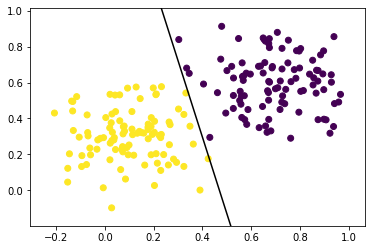

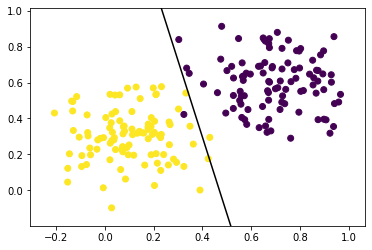

In [ ]:
def train_bce(x, y, w, b, eps, n):
  # doimplementujte
  ...


train_bce(x, y_bce, w, b, 1e-2, 5000)
train_bce(x, y_bce, w, b, 1e-3, 5000)

y_pred = predict(torch.from_numpy(x).type(torch.FloatTensor), w, b).numpy()

display_binary_cls(x, y_pred, w.detach().numpy(), b.detach().numpy())
display_binary_cls(x, y, w.detach().numpy(), b.detach().numpy())

### Bonusová úloha

Kto všetko stihol môže si spraviť plne prepojenú neurónovú sieť namiesto obyčajného lineárneho klasifikátora. Napr. ak pridáme ešte jednu skrytú vrstvu, tak dostaneme:

$$f_{c} = \sigma\left(\vec{w}_{out}^T \vec{\sigma}\left(W_{in} \vec{x} + \vec{b}_{in}\right) + b_{out}\right),$$

kde $W_{in} \in \mathbb{R}^{h \times 2}$ je matica $h \times 2$ váh, $\vec{b}_{in} \in \mathbb{R}^{h}$ je bias vektor aplikovaný po prvej matici, $w_{out} \in \mathbb{R}^{h}$ je vektor váh s dĺžkou $h$ a $b_{out} \mathbb{R}$ je bias parameter, pričom $h$ je počet neurónov skrytej vrstvy a $\vec{\sigma}$ je funkcia sigma aplikovaná po každom prvku vektora samostatne.

Ak stihnete funkciu naimplementovať, tak môžete skúsiť opäť pridať aj regularizačný člen pre váhový vektor a váhovú maticu. Teda loss bude mať tvar:

$$L(\vec{w}, b, X, Y) = -\frac{1}{m} \sum_{i = 1}^m y_i \text{log}\left(\sigma(\vec{w}^T \vec{x}_i + b)\right) + (1 - y_i) \text{log}\left(1 - \sigma(\vec{w}^T \vec{x}_i + b)\right) + \lambda \left(\sum_{i, j} W_{in,i,j}^2 + \sum_{i} w_{out,i}^2 \right)$$



In [ ]:
w_out = Variable(torch.randn(30).type(torch.FloatTensor), requires_grad=True)
b_out = Variable(torch.randn(1).type(torch.FloatTensor), requires_grad=True)

w_in = Variable(torch.randn(30, 2).type(torch.FloatTensor), requires_grad=True)
b_in = Variable(torch.randn(30).type(torch.FloatTensor), requires_grad=True)

# vygenerujeme nove data
y_fc = np.where(y > 0.5, 1.0, 0.0)

def forward_fc(x, w_in, b_in, w_out, b_out):
  # doimplementujte
  ...

def predict_fc(x, w_in, b_in, w_out, b_out):
  # doimplementujte
  ...

with torch.no_grad():
  print(forward_fc(torch.from_numpy(np.array([[0.5, 0.5]], dtype=np.float32)),  w_in, b_in, w_out, b_out))
  print(forward_fc(torch.from_numpy(np.array([[1.0, -0.5]], dtype=np.float32)), w_in, b_in, w_out, b_out))
  print(forward_fc(torch.from_numpy(np.array([[-0.9, 4.4]], dtype=np.float32)), w_in, b_in, w_out, b_out))

  print(predict_fc(torch.from_numpy(np.array([[0.5, 0.5]], dtype=np.float32)), w_in, b_in, w_out, b_out))
  print(predict_fc(torch.from_numpy(np.array([[1.0, -0.5]], dtype=np.float32)), w_in, b_in, w_out, b_out))
  print(predict_fc(torch.from_numpy(np.array([[-0.9, 4.4]], dtype=np.float32)), w_in, b_in, w_out, b_out))

def train_fc(x, y, w_in, b_in, w_out, b_out, eps, n):
  # doimplementujte
  ...

train_fc(x, y_fc, w_in, b_in, w_out, b_out, 1e-2, 5000)
train_fc(x, y_fc, w_in, b_in, w_out, b_out, 1e-3, 5000)

y_pred = predict_fc(torch.from_numpy(x).type(torch.FloatTensor), w_in, b_in, w_out, b_out,).numpy()

print(np.sum(y_pred == y_fc)/len(y_fc))

#display_binary_cls(x, y_pred, w.detach().numpy(), b.detach().numpy())
#display_binary_cls(x, y, w.detach().numpy(), b.detach().numpy())

tensor([0.0624])
tensor([0.0418])
tensor([0.0359])
tensor([0])
tensor([0])
tensor([0])
At step: 0 loss: 1.1348921060562134
At step: 100 loss: 0.4875163733959198
At step: 200 loss: 0.4433864951133728
At step: 300 loss: 0.4141427278518677
At step: 400 loss: 0.3883458077907562
At step: 500 loss: 0.36542579531669617
At step: 600 loss: 0.34498223662376404
At step: 700 loss: 0.3266744613647461
At step: 800 loss: 0.31021320819854736
At step: 900 loss: 0.2953532338142395
At step: 1000 loss: 0.2818862795829773
At step: 1100 loss: 0.26963576674461365
At step: 1200 loss: 0.2584514915943146
At step: 1300 loss: 0.24820548295974731
At step: 1400 loss: 0.23878832161426544
At step: 1500 loss: 0.23010610044002533
At step: 1600 loss: 0.2220781147480011
At step: 1700 loss: 0.21463461220264435
At step: 1800 loss: 0.20771507918834686
At step: 1900 loss: 0.201266810297966
At step: 2000 loss: 0.19524390995502472
At step: 2100 loss: 0.1896059811115265
At step: 2200 loss: 0.18431764841079712
At step: 2300 loss